## Unlocking Investor Insights: Leveraging Instagram Advertising Data for Competitive Edge in Investment Strategies

- Utilize dataset of 730+ brands on Instagram, tracking ad metrics weekly
- Spend one-third of time discussing with stakeholders to build compelling narrative
- Develop model to identify significant deviations from trends, focusing on anomalies within brands
- Deliver Jupyter notebooks and technical report to demonstrate approach's reasonability
- Provide insights on data's investor utility
- Constantly question assumptions and document progress
- Develop baseline and advanced models for anomaly detection

In [2]:
import pandas as pd
data_path = '../data/skylab_instagram_datathon_dataset.csv'

This is how the dataset structure looks like:

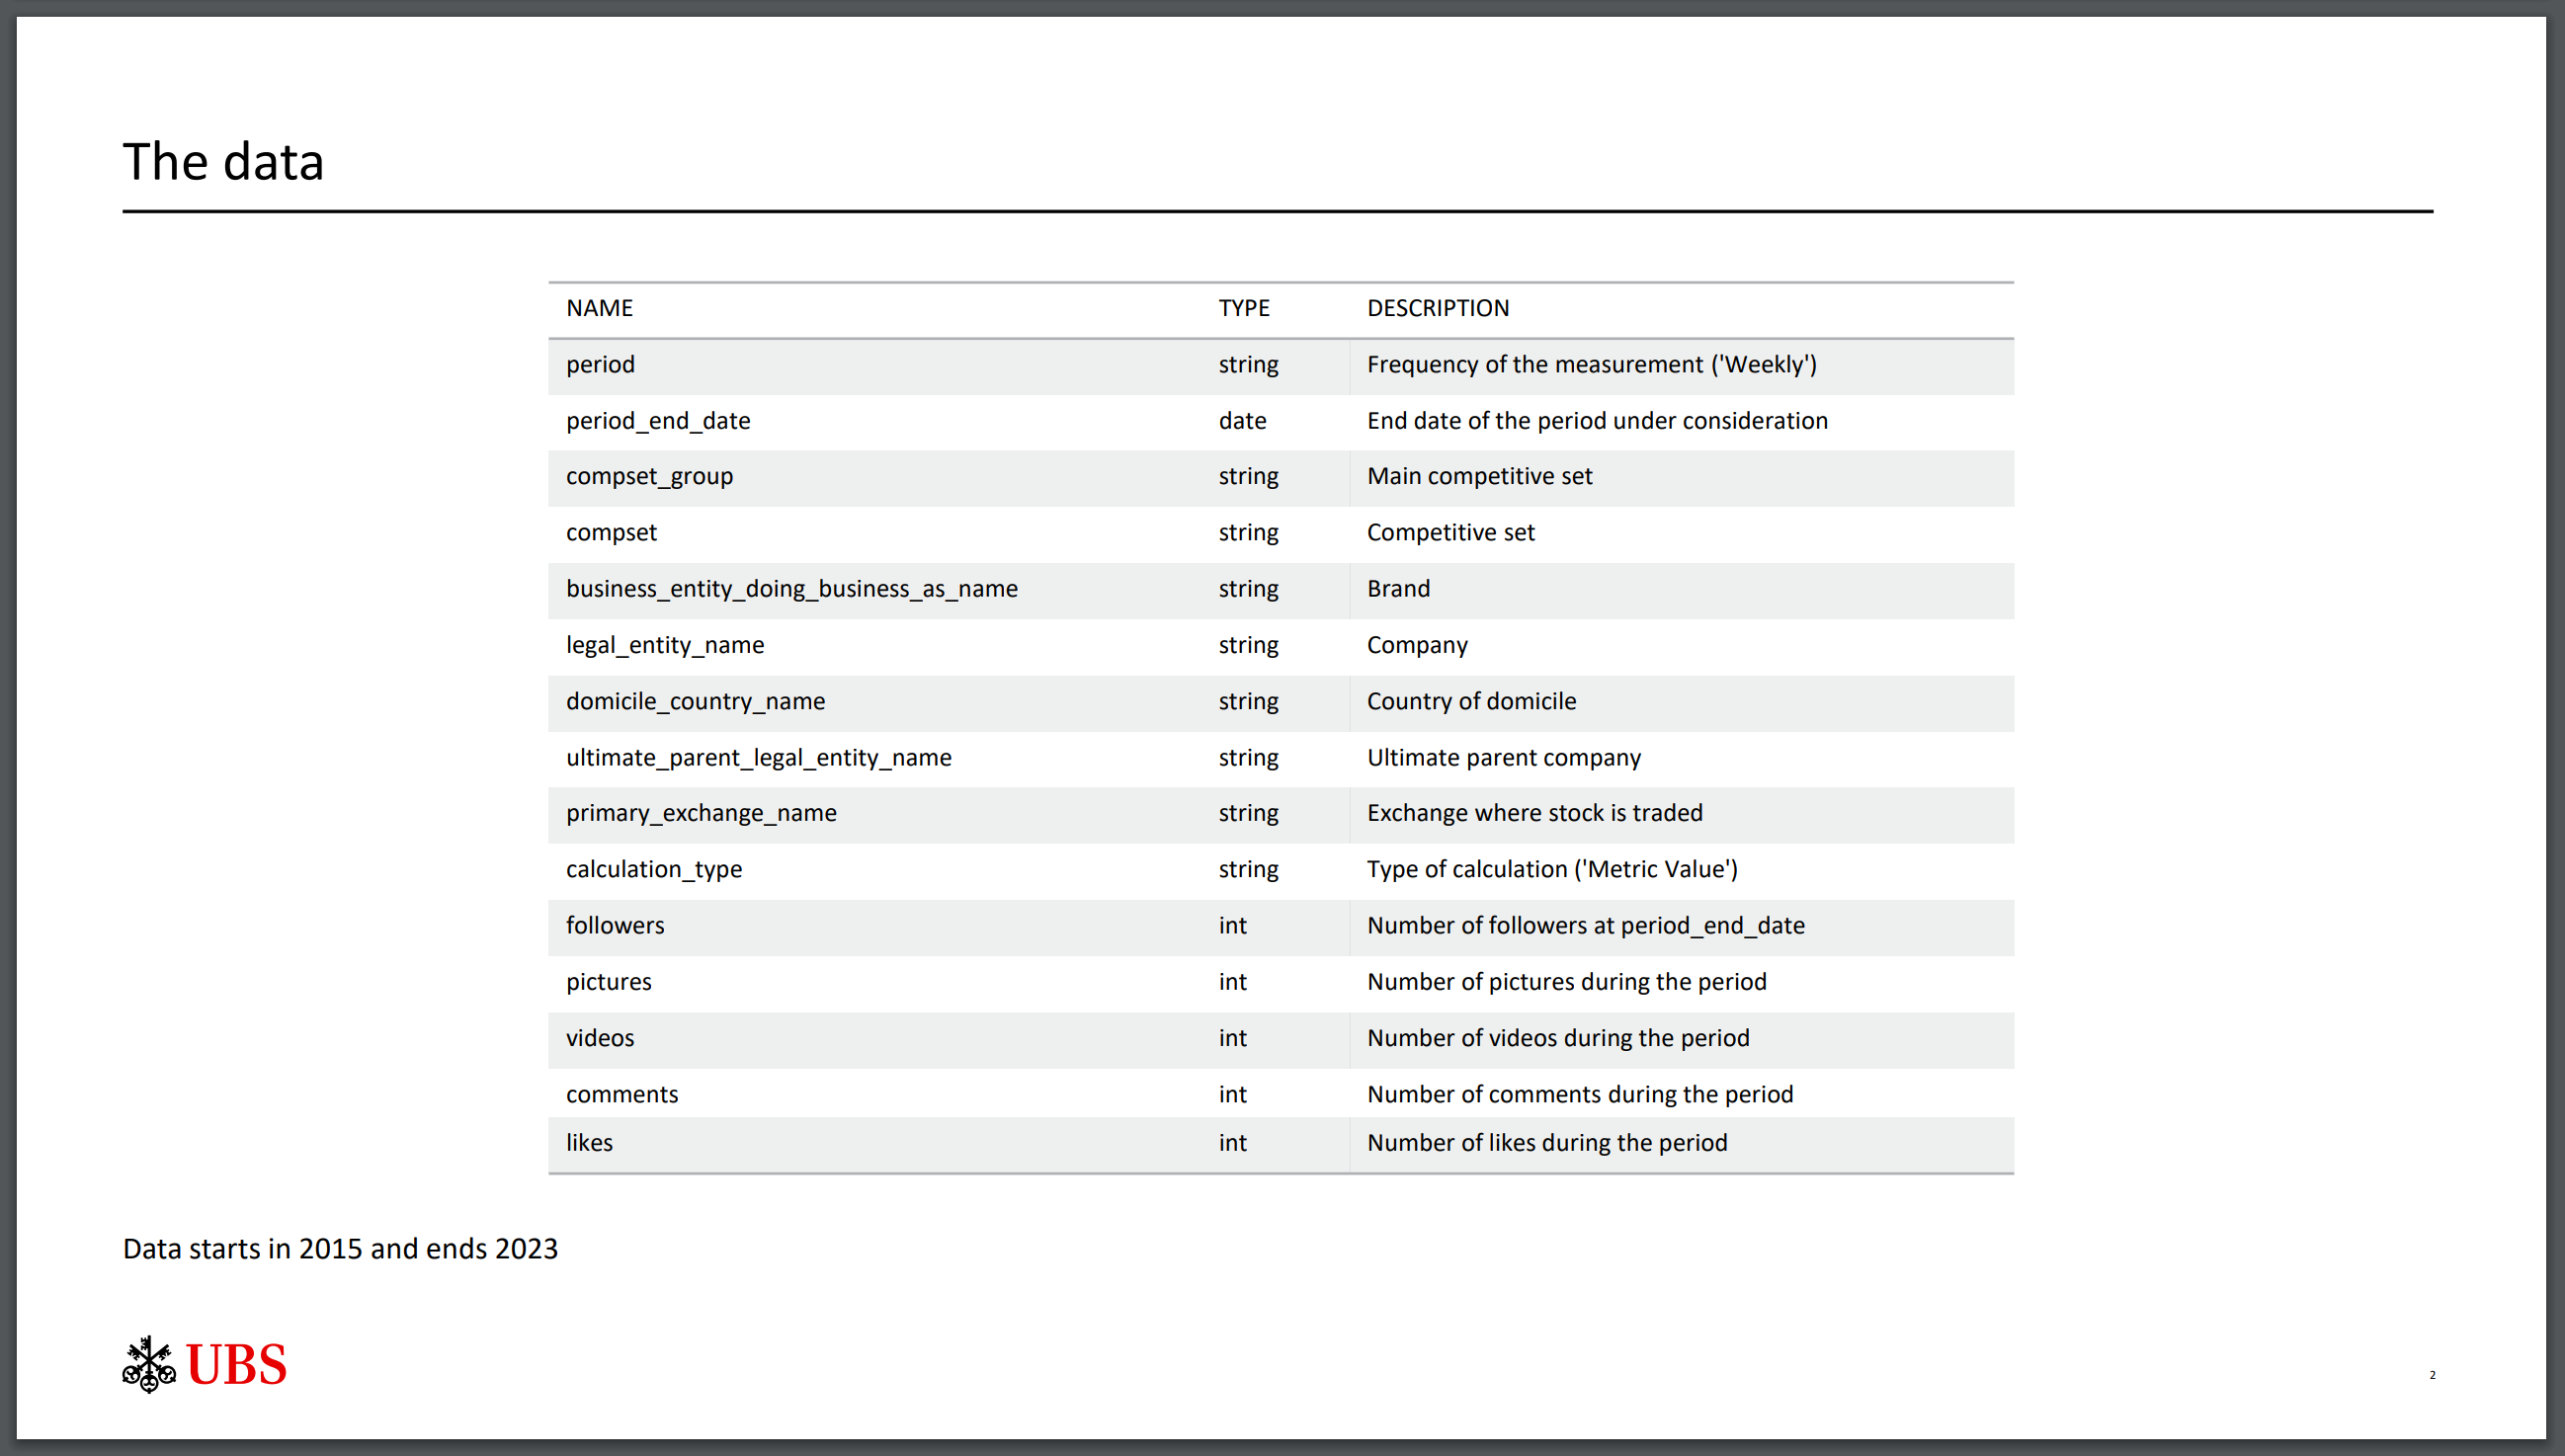

In [7]:
# Load the data
data = pd.read_csv(data_path, sep=';')
data.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0


## Getting a Sense of the Categorial Data
- The dataset has categorical data, which can be used to identify the brand and the type of ad. 

### The Period Column

In [14]:
# look at how many different values we have for the 'period' column
data['period'].value_counts()

Weekly    704313
Name: period, dtype: int64

#### Findings

* The period column is redundant and can be dropped. The data is already sorted by period, so it is not necessary to keep it.
* There are **704313** rows in the dataset.

### The period_end_date Column

In [25]:
# look at how many different values we have for 'period_end_date' column:
data['period_end_date'].value_counts()

2023-07-08    1635
2023-06-17    1635
2023-05-27    1635
2023-05-13    1635
2023-09-02    1635
              ... 
2015-01-24    1174
2015-01-31    1174
2015-01-17    1174
2015-01-10    1173
2015-01-03    1170
Name: period_end_date, Length: 455, dtype: int64

In [27]:
# look at how many unique values we have for 'period_end_date' column:
data['period_end_date'].nunique()

455

#### Findings: 
* The period_end_date column has **455** unique values.

### The compset_group Column:

In [8]:
# look at how many different values we have for the 'compset_group' column
data['compset_group'].value_counts()

Luxury & Premium & Mainstream    216241
Apparel Retail                   209573
Sportswear & Athleisure           57068
Beauty & Boutique                 44266
Food Products                     42612
Beverages                         41471
Restaurants                       37599
Outdoor Gear                       9536
Fitness & Exercise                 8978
Dermatology and Orthodontics       7819
Mattress                           5107
Petcare                            4896
Building Products                  4376
Sporting Goods                     3185
Home Appliances                    3013
Food Retail                        2574
Toys & Collectibles                2229
Discount Retailers                 2100
Entertainment                      1215
Study (All Brands)                  455
Name: compset_group, dtype: int64

In [18]:
# look at how many groups we have in the 'compset_group' column
data['compset_group'].nunique()

20

#### Findings: 
* the compset_group has 20 unique values.

### The compset Column:

In [11]:
# look at how many different values we have for the 'compset' column
data['compset'].value_counts()

US Softlines Analyst Interest List      113744
Apparel Retail                           69341
Luxury & Premium & Mainstream            64541
Beauty & Boutique                        44266
Global Luxury Analysts Interest List     29233
Omnichannel Apparel Retail               25049
Sportswear & Athleisure                  20900
Food Products                            20396
Beverages                                20053
Ecommerce Apparel Retail                 19614
Fast Fashion                             19281
Soft Luxury                              19170
Restaurants                              18117
Hard Luxury                              14955
Alcohol                                  13367
Sportswear                               12711
Premium Brands                           12125
Footwear                                 11731
Ecommerce Mainstream Apparel Retail       9463
Fitness & Exercise                        8978
Mid-Range Watch & Jewelry                 8924
Outdoor Gear 

In [20]:
# look at how many unique values we have for the 'compset' column
data['compset'].nunique()

54

#### Findings:
* The compset column has 54 unique values.

### The business_entity_doing_business_as_name Column:

In [29]:
# look at how many different values bussiness_entity_doing_bussiness_as_name column has
data['business_entity_doing_business_as_name'].value_counts()

All Brands         27755
Missguided          2275
Poshmark            2275
SHEIN               2275
Aeropostale         2275
                   ...  
MARVEL               216
Temu                  55
ShopGoodwill          52
Finding Unicorn       46
Pop Mart              46
Name: business_entity_doing_business_as_name, Length: 706, dtype: int64

In [30]:
# look at how many unique values bussiness_entity_doing_bussiness_as_name column has
data['business_entity_doing_business_as_name'].nunique()

706

#### Findings:
* The business_entity_doing_business_as_name column has **706** unique values.

### The legal_entity_name Column:

In [31]:
# look at how many different values we have for the 'legal_entity_name' column
data['legal_entity_name'].value_counts()

LVMH Moet Hennessy Louis Vuitton SE                 27576
Richemont                                           21580
Swatch                                              18860
Anheuser-Busch                                      12644
Kering                                              10660
                                                    ...  
Aga Marvel                                            216
WhaleCo Inc                                            55
Goodwill Industries of Orange County                   52
Shenzhen Seulin Culture & Entertainment Co., Ltd       46
Pop Mart International Group Ltd                       46
Name: legal_entity_name, Length: 423, dtype: int64

In [32]:
# look at how many unique values we have for the 'legal_entity_name' column
data['legal_entity_name'].nunique()

423

#### Findings:
* The legal_entity_name column has **423** unique values.

### The domicile_country_name Column:

In [33]:
# look at how many different values we have for the 'domicile_country_name' column
data['domicile_country_name'].value_counts()

United States of America                                193509
France                                                   62164
Switzerland                                              44746
United Kingdom of Great Britain and Northern Ireland     31368
Brazil                                                   17243
Hong Kong                                                16151
Japan                                                    15357
Germany                                                  13438
Belgium                                                  12644
Italy                                                    10416
Spain                                                    10010
Netherlands                                               6280
Canada                                                    6170
Sweden                                                    5460
Australia                                                 4004
New Zealand                                            

In [34]:
# look at how many unique values we have for the 'domicile_country_name' column
data['domicile_country_name'].nunique()

26

#### Findings: 
* The domicile_country_name column has **26** unique value.

### The ultimate_parent_legal_entity_name Column:

In [35]:
# look at how many different values we have for the 'ultimate_parent_legal_entity_name' column
data['ultimate_parent_legal_entity_name'].value_counts()

LVMH Moet Hennessy Louis Vuitton SE                 27576
Richemont                                           21580
Swatch                                              18860
Anheuser-Busch                                      12644
Kering                                              10660
                                                    ...  
Aga Marvel                                            216
Pinduoduo                                              55
Goodwill Industries International Inc                  52
Pop Mart International Group Ltd                       46
Shenzhen Seulin Culture & Entertainment Co., Ltd       46
Name: ultimate_parent_legal_entity_name, Length: 401, dtype: int64

In [36]:
# look at how many unique values we have for the 'ultimate_parent_legal_entity_name' column
data['ultimate_parent_legal_entity_name'].nunique()

401

#### Findings:
* The ultimate_parent_legal_entity_name column has **401** unique values.

### The primary_exchange_name Column:

In [37]:
# look at how many different values we have for the 'primary_exchange_name' column
data['primary_exchange_name'].value_counts()

New York Stock Exchange                               132071
Euronext Paris                                         62164
NASDAQ Global Select                                   55132
Six Swiss Exchange                                     44746
London Stock Exchange                                  30913
Bolsa de Valores de Sao Paulo (XBSP)                   17243
Hong Kong Exchange                                     16151
Tokyo Stock Exchange                                   15357
Deutsche Boerse Xetra                                  13438
Nyse Euronext - Euronext Brussels                      12644
Borsa Italiana S.P.A.                                  10416
Bolsa De Madrid                                        10010
Nyse Euronext - Euronext Amsterdam                      6280
Toronto Stock Exchange                                  6170
Nasdaq Omx Nordic                                       5460
Asx - All Markets                                       4004
NASDAQ Global Market    

In [38]:
# look at how many unique values we have for the 'primary_exchange_name' column
data['primary_exchange_name'].nunique()

30

#### Findings:
* The primary_exchange_name column has **30** unique values.
* Different companies are traded on different markets. Does this even matter?? We don't know at this point!

### The calculation_type Column:

In [39]:
# look at how many different values we have for the 'calculation_type' column
data['calculation_type'].value_counts()

Metric Value    704313
Name: calculation_type, dtype: int64

#### Findings:
* The calculation_type column is redundant and can be dropped.

## Getting a Sense of the Numerical Data

### The followers Column:

#### Findings:
* The followers column contains integers indicating the total number of followers a company had in that specific week
* Companies have a non zero, positive number of followers

### The pictures and videos columns:

#### Findings:
* Indicate the amount of new pictures or videos (respectively) posted to the instagram in that week
    * We assume this as we have checked random brands (Versace, John John Denim, GAF roofing) and found their weekly 'pictures' and 'videos' values were far below their total number of posts on instagram
* However, this value is still above the number of posts we counted manually in the week on their account
    * This could be due to them deleting old posts so we can't see them
    * And/or this column may be including posts on stories and 'sliding posts' as individual pictures and videos
* This values are non negative, so it is NOT the change in pictures / videos over the week, but instead the number of new (non-zero) posts made over the week


### The likes and comments columns

#### Findings:
* Simarlarly, this is the number of new likes and comments gained over the week (on any posts)
* The reason it's not the number of likes and comments gained on the new posts of the week is the GAF example
    * GAF had a few weeks with record high likes and comments (120k per week vs the usual 5k)
    * This was due to 3 posts made in collaboration with a celebrity (also posted on his account)
    * These celebrity posts were from a few weeks prior, so it must be that the likes column includes likes on posts from previous weeks 